In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import utils as utils
import matplotlib as plt

# Task 1 : KNN with 4 features

### loading 30s dataset

In [2]:
df = utils.task1_df()
df

,spectral_rolloff_mean,mfcc_1_mean,spectral_centroid_mean,tempo,Type,GenreID
0,5351.909304,9.675074,2569.255823,117.453835,Train,0
1,6839.566975,-63.635056,2844.070408,107.666016,Train,0
2,6873.341771,-119.346458,2765.648135,161.499023,Train,0
3,7534.996104,-26.936581,3634.106564,117.453835,Train,0
4,7879.044023,-8.531343,3671.260489,129.199219,Train,0
...,...,...,...,...,...,...
985,1838.497216,-270.312012,1039.710475,95.703125,Test,9
986,2730.541822,-190.396072,1428.038743,95.703125,Test,9
987,5135.260614,-149.196808,2414.857050,83.354335,Test,9
988,4355.815328,-223.030594,1884.943901,161.499023,Test,9


In [3]:
X_train_scaled, y_train, X_test_scaled, y_test = utils.train_val_split(df)

### Begin knn training

In [4]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform')# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [5]:
res = knn.predict(X_test_scaled)

### Evaluation

Accuracy

In [6]:
np.mean(res == y_test)

0.398989898989899

Confusion Matrix

<Axes: >

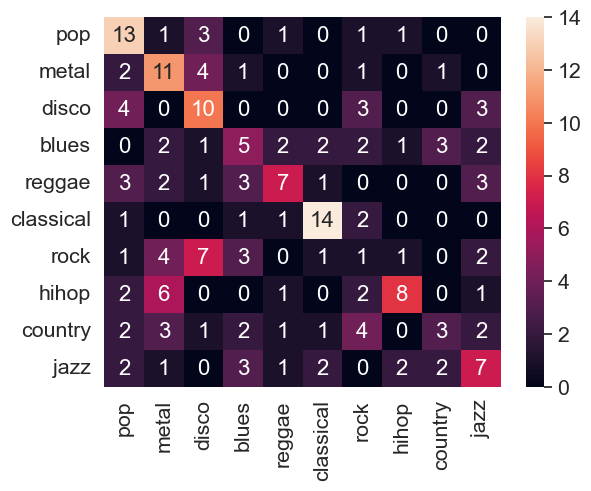

In [7]:
from sklearn.metrics import confusion_matrix

confMatrix = pd.DataFrame(confusion_matrix(y_test,res),utils.genreNames,utils.genreNames)
sn.set(font_scale=1.4)
sn.heatmap(confMatrix, annot=True, annot_kws={"size": 16})